## 1. Introduction
### 1.1. Outline
#### Company Background
PetMind is a nationwide pet product retailer in the United States. With inflation hitting 41-year highs, the company is planning to reduce the cost of customer retention by improving brand loyalty.

The first strategy is to launch a monthly pet box subscription in three months.

The marketing team is preparing a list of popular products for the pet box subscription.

The chief marketing officer wants to know whether the list should only include the products being purchased more than once.

![cover](Cover.jpg)

### 1.2. The data

The dataset contains the sales records in the stores last year. 

The dataset needs to be validated based on the description below:
- "Product ID" : The unique identifier of the product.
- "Product Category" : The category of the product, one of 11 categories.
- "Sales" : The sales of the product in dollars last year.
- "Price" : The price of the product in dollars
- "Vendor ID" : The unique identifier of the vendor for the product.
- "Pet Size" : The pet size category the product is designed for, one of 5 size categories.
- "Pet Type" : The pet type the product is designed for, one of “cat”, “dog”, “fish”, “bird”.
- "Rating" : Customer’s rating of the product (should be on a 10 point scale)
- "Rebuy" : Whether the product is purchased more than once or not (should be 1 or 0)


### <a name="1.3. Data Validation">1.3. Data Validation</a>
After an exploratory data analysis, I validated the data based on my findings and the provided data dictionary:

- First, I changed the values of the Product ID column to strings of characters using the astype() method.
- Next, I removed the special characters in the Sales column using the str.replace() function and changed the values to numeric using the astype().
- Check if we have any missing values.
- Then, I examined the unique values of the remaining columns.
- Check pet types and drop their records for hamster and rabbit.

### <a name="1.4. Data Discovery and Visualization">1.4. Data Discovery and Visualization</a>
My findings include:

- The top 3 categories by sales are equipment, snack, and toys - their total "46.465M" is almost half (48%) of the total sales . This is illustrated by the first bar graph.

- Similarly, the top 3 repurchased categories are equipment, snack, and toys. Of the 186 repurchased items for dogs, cats, birds, and fish, 18% of repurchased items were equipment, 15% were snacks, and 14% were toys. They make up almost half (47%) of the repurchased times. This is illustrated by the second bar graph.

- With a correlation coefficient of 0.98, there is a strong positive correlation between sales and repurchases. Hence, the products being purchased again have better sales than others. This is illustrated by the scatterplot and heatmap.

- Although equipment, snack, and toys were commonly repurchased across all pets, medicine was repurchased more than toys for dogs. This is illustrated in last bar graph. Despite the frequency of medicine repurchases, it would not be a good idea to include medicine in our subscription boxes. Therefore, for all pet boxes, even the dog boxes, snacks, equipment and toys should be included.

## 2. Objective :
To find out whether the subscription box should include only the products which are being purchased more than once.

- How many products are being purchased more than once?
- Do the products being purchased again have better sales than others?
- What products are more likely to be purchased again for different types of pets?
- Shall we include the products not being purchased twice?

## 3. Conclution :
- It's not recommended to include medicie in boxes even in dogs boxes.
- It's recommended to include equipment, snack, and toys in all boxes.
- Due to a strong positive correlation between sales and repurchases, products being purchased again have better sales than others. These **repurchased products** should be offered in pet boxes.

&nbsp;

|                                 |                             |
|---------------------------------|-----------------------------|
|Sales by Category                |![cover](Sales_by_category.jpg) 
|Repurchase by Category           |![cover](repurchase_by_category.jpg) 
|Sales vs Repurchase              |![cover](sales_repurchase.jpg)
|Sales vs Repurchase Correlation  |![cover](Sales_corr.jpg) 
|Sales by Pet Type  |![cover](Sales_by_pet.jpg) 


### 1.3. Data Validation

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('pet_sales.csv')

In [75]:
# change product_id from numeric (int) to character (obj)
df['product_id'] = df['product_id'].astype(str)

# remove characters from sales
df['sales'] = df['sales'].apply(lambda x: x.replace(',', '').replace('$','')).astype('int64')

In [76]:
# check 
df.dtypes

product_id           object
product_category     object
sales                 int64
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                int64
dtype: object

In [77]:
# check
df.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0
2,4237,Toys,218000,106.34,VC_802,small,hamster,6,0
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0


In [78]:
# check missing values
df.isnull().sum()

product_id          0
product_category    0
sales               0
price               0
vendor_id           0
pet_size            0
pet_type            0
rating              0
re_buy              0
dtype: int64

In [79]:
# list pet_size values with its count
df['pet_size'].value_counts()

small          280
medium         279
large          107
extra_small    107
extra_large    106
Name: pet_size, dtype: int64

In [80]:
df['product_category'].value_counts()

Equipment      141
Toys           141
Snack          141
Medicine        76
Supplements     75
Food            75
Bedding         46
Housing         46
Clothes         46
Accessory       46
Grooming        46
Name: product_category, dtype: int64

In [81]:
df[['rating']].value_counts()

rating
10        222
6         213
7         120
1          65
2          62
8          46
9          43
3          37
5          37
4          34
dtype: int64

In [82]:
# list pet_types values with its count
df['pet_type'].value_counts()

cat        347
dog        347
fish        70
bird        69
hamster     23
rabbit      23
Name: pet_type, dtype: int64

In [83]:
df[df['pet_type'].isin(['rabbit','hamster'])].shape

(46, 9)

In [84]:
# drop rows that are not "cat” ,“dog”, “fish”, “bird”
df.drop(df[(df['pet_type'] =='hamster') | (df['pet_type'] =='rabbit')].index, inplace=True)

# check again
df[df['pet_type'].isin(['rabbit','hamster'])].shape

(0, 9)

### 1.4. Data Discovery and Visualization

In [85]:
# establish context, style, size
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set(rc={'figure.figsize': (10,4.5)})

def formatter(x, pos):
   return str(round(x / 1e6, 1)) + " M"

In [86]:
# which product garners the most sales?
sales_by_cat=df.groupby('product_category')['sales'].sum().sort_values(ascending=False).reset_index(name='sales')
sales_by_cat['ptc_sales'] = round(sales_by_cat['sales'] / sales_by_cat['sales'].sum(),3)

print("Total Sales of Top 3 products is : {} M.".format(sales_by_cat.loc[sales_by_cat['product_category'].isin(['Equipment','Snack','Toys']),'sales'].sum()/1000000))

sales_by_cat
# top 3 product cat by sales: equipment, snack, toys

Total Sales of Top 3 products is : 46.465 M.


,product_category,sales,ptc_sales
0,Equipment,16347000,0.169
1,Snack,15965000,0.165
2,Toys,14153000,0.146
3,Medicine,8814000,0.091
4,Supplements,7966000,0.082
5,Food,7449000,0.077
6,Accessory,5791000,0.060
7,Clothes,5362000,0.055
8,Bedding,5236000,0.054
9,Grooming,5131000,0.053


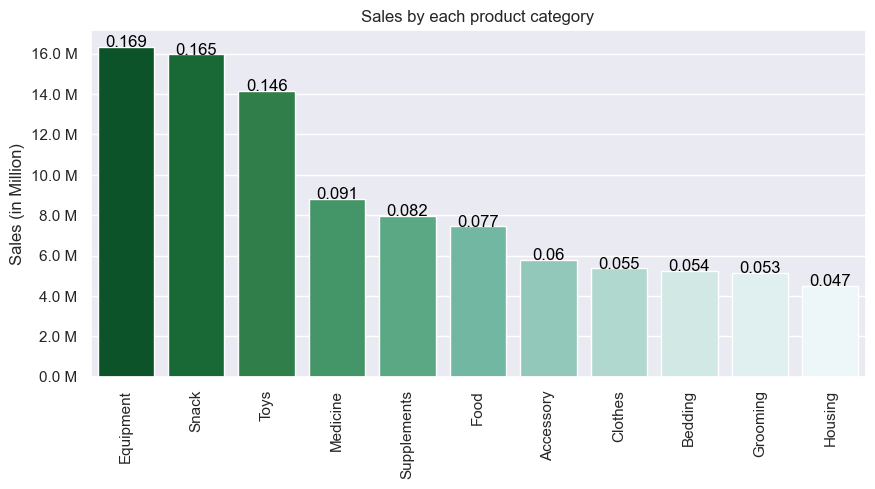

In [87]:
g=sns.barplot(x ='product_category', y='sales', data=sales_by_cat, palette="BuGn_r")
g.yaxis.set_major_formatter(formatter)

# assign bar value  to each row
for index, row in sales_by_cat.iterrows():
    g.text(row.name, row.sales, round(row.ptc_sales, 3),
            color='black', ha='center')
    
plt.ylabel('Sales (in Million)')
plt.xlabel(None)
plt.xticks(rotation=90)
plt.title("Sales by each product category")
plt.show();

In [88]:
rebuy_by_cat = df.groupby('product_category')['re_buy'].sum().sort_values(ascending=False).reset_index(name='repurchase')
rebuy_by_cat['ptc_repurchase'] = round(rebuy_by_cat['repurchase'] / rebuy_by_cat['repurchase'].sum(),3)
rebuy_by_cat

,product_category,repurchase,ptc_repurchase
0,Equipment,69,0.177
1,Snack,59,0.151
2,Toys,58,0.149
3,Food,37,0.095
4,Medicine,37,0.095
5,Supplements,30,0.077
6,Bedding,24,0.062
7,Accessory,20,0.051
8,Housing,20,0.051
9,Clothes,19,0.049


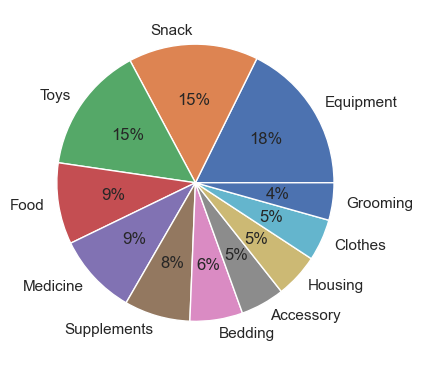

In [89]:
plt.pie(rebuy_by_cat['repurchase'], labels=rebuy_by_cat['product_category'], autopct='%.0f%%');

In [90]:
# Which products are being repurchased?
sales_v_rebuy=df.pivot_table(values=['sales','re_buy'], index='product_category', aggfunc='sum').sort_values(by=['re_buy'],ascending=False).reset_index()

sales_v_rebuy

,product_category,re_buy,sales
0,Equipment,69,16347000
1,Snack,59,15965000
2,Toys,58,14153000
3,Food,37,7449000
4,Medicine,37,8814000
5,Supplements,30,7966000
6,Bedding,24,5236000
7,Accessory,20,5791000
8,Housing,20,4498000
9,Clothes,19,5362000


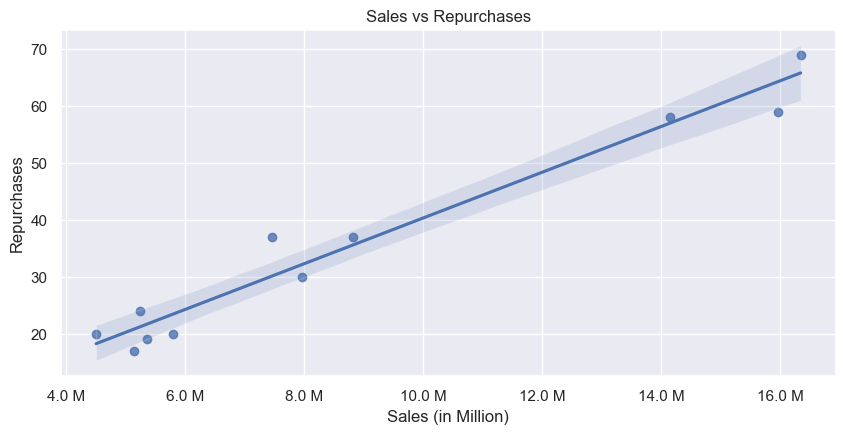

In [91]:
g=sns.regplot(x ='sales', y='re_buy', data=sales_v_rebuy)  
g.xaxis.set_major_formatter(formatter)

plt.xlabel('Sales (in Million)')
plt.ylabel('Repurchases')

plt.title("Sales vs Repurchases")
plt.show();

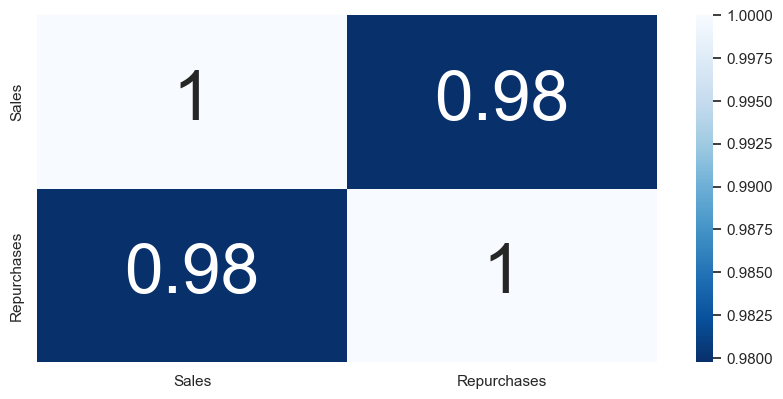

In [92]:
# create correlation dataframe for a heatmap
corr_df = sales_v_rebuy[['sales', 're_buy']].corr()

# visualize data in a heatmap
col = ['Sales', 'Repurchases']
hm = sns.heatmap(corr_df, annot = True, annot_kws = {'size':'50'}, xticklabels = col, yticklabels = col, cmap='Blues_r')
# correlation coefficient of 0.98 suggests there is a strong positive correlation between sales and repurchases

In [93]:
# how do repurchases vary by pet types?
rebuy_by_pet=df.pivot_table(values='re_buy', index=['pet_type', 'product_category'], aggfunc='sum').sort_values(by=['re_buy','pet_type'],ascending=[False,False]).reset_index()

rebuy_by_pet

,pet_type,product_category,re_buy
0,dog,Equipment,28
1,cat,Equipment,27
2,dog,Snack,25
3,cat,Toys,25
4,dog,Medicine,20
5,dog,Toys,19
6,cat,Snack,19
7,cat,Food,18
8,dog,Food,17
9,cat,Supplements,17


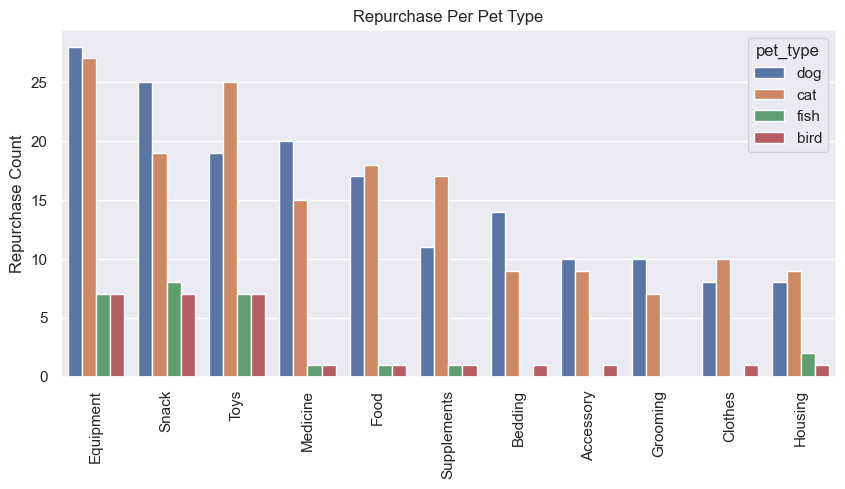

In [94]:
#pets=['dog', 'cat', 'fish','bird'] , hue_order=pets
sns.barplot(x='product_category', y='re_buy', data=rebuy_by_pet, hue='pet_type')

plt.ylabel('Repurchase Count')
plt.xlabel(None)
plt.xticks(rotation=90)
plt.title("Repurchase Per Pet Type")
plt.show();